<a href="https://colab.research.google.com/github/saqlain2204/ML-projects/blob/main/breast_cancer_prediction_uisng_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import pandas as pd

In [11]:
url = "https://raw.githubusercontent.com/saqlain2204/ML-projects/main/Breast-Cancer-detection/data.csv"
df = pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
df.drop(['id'], axis=1, inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
for column in df.columns:
  print(column,":", df[column].dtype,"\n")

diagnosis : object 

radius_mean : float64 

texture_mean : float64 

perimeter_mean : float64 

area_mean : float64 

smoothness_mean : float64 

compactness_mean : float64 

concavity_mean : float64 

concave_points_mean : float64 

symmetry_mean : float64 

fractal_dimension_mean : float64 

radius_se : float64 

texture_se : float64 

perimeter_se : float64 

area_se : float64 

smoothness_se : float64 

compactness_se : float64 

concavity_se : float64 

concave_points_se : float64 

symmetry_se : float64 

fractal_dimension_se : float64 

radius_worst : float64 

texture_worst : float64 

perimeter_worst : float64 

area_worst : float64 

smoothness_worst : float64 

compactness_worst : float64 

concavity_worst : float64 

concave_points_worst : float64 

symmetry_worst : float64 

fractal_dimension_worst : float64 



In [23]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [24]:
# Majority is always 0 and minority class is always labelled as 1

In [25]:
df['diagnosis'] = df['diagnosis'].replace('B', 0)
df['diagnosis'] = df['diagnosis'].replace('M', 1)

In [26]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(['diagnosis'], axis = 1)
y = df[['diagnosis']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [30]:
X_train, X_test, y_train, y_test = torch.FloatTensor(X_train), torch.FloatTensor(X_test),torch.FloatTensor(y_train), torch.FloatTensor(y_test)
print(X_train[0].shape)

torch.Size([30])


In [37]:
class NeuralNet(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_layer1, hidden_layer2):
    super(NeuralNet, self).__init__()
    self.network = nn.Sequential(
        nn.Linear(input_dim, hidden_layer1),
        nn.ReLU(),
        nn.Linear(hidden_layer1, hidden_layer2),
        nn.ReLU(),
        nn.Linear(hidden_layer2, output_dim),
        nn.Sigmoid()
    )
  def forward(self, x):
    x = self.network(x)
    return x

In [38]:
input_dim = 30
output_dim = 1
hidden_layer1 = 16
hidden_layer2 = 4
model = NeuralNet(input_dim, output_dim, hidden_layer1, hidden_layer2)

In [41]:
from torch.optim import Adam
from torch.nn import BCELoss

optimizer = Adam(model.parameters(), lr=0.01)
criterion = BCELoss(reduction = 'sum')

In [46]:
for epochs in range(500):
    y_pred = model(X_train.float())
    loss = criterion(y_pred, y_train.float())
    print('Epoch',epochs,'Loss:',loss.item(), '- Pred:', y_pred.data)

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Streaming output truncated to the last 5000 lines.
        [4.4405e-02],
        [9.4078e-04],
        [4.2978e-01],
        [1.1569e-03],
        [1.8777e-02],
        [3.8229e-02],
        [1.0000e+00],
        [1.0000e+00],
        [8.0261e-02],
        [6.5083e-03],
        [4.6515e-04],
        [1.0000e+00],
        [1.5874e-02],
        [9.0133e-02],
        [9.3580e-04],
        [9.9999e-01],
        [1.0000e+00],
        [3.3991e-05],
        [1.0000e+00],
        [1.0000e+00],
        [9.8064e-04],
        [9.5051e-05],
        [2.3535e-02],
        [2.0173e-03],
        [5.3079e-03],
        [7.8926e-02],
        [1.0000e+00],
        [4.2876e-04],
        [1.5967e-02],
        [2.0163e-04],
        [1.2369e-04],
        [1.0000e+00],
        [2.1273e-03],
        [9.8913e-01],
        [2.5119e-02],
        [3.9408e-02],
        [4.1771e-04],
        [5.7766e-04],
        [1.0000e+00],
        [1.0000e+00],
        [6.6676e-04],
        [1.2469e-02],
        [1.7922e-03],
   

In [47]:
model.forward(X_test.data[55]) > 0.5, y_test[55]

(tensor([False]), tensor([0.]))

In [58]:
pred = model.forward(X_test) > 0.5
pred = pred.double().detach().numpy()
pred = pd.Series(pred.flatten())

In [60]:
pred.value_counts()

0.0    108
1.0     63
Name: count, dtype: int64

In [61]:
y_check = y_test.double().detach().numpy()
y_check = pd.Series(y_check.flatten())
y_check

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
166    1.0
167    0.0
168    0.0
169    0.0
170    1.0
Length: 171, dtype: float64

In [62]:
y_check.value_counts()

0.0    109
1.0     62
Name: count, dtype: int64

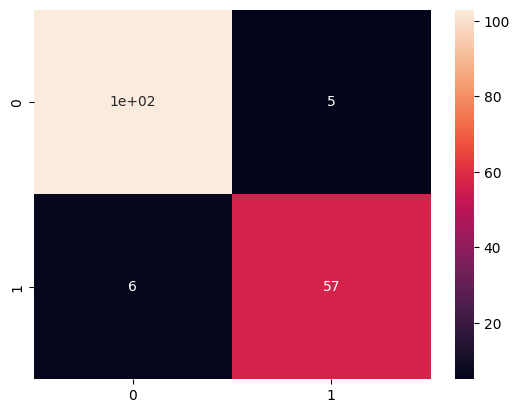

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
c = confusion_matrix(pred, y_check)
sns.heatmap(c, annot=True);

In [65]:
print(classification_report(pred, y_check))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       108
         1.0       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [67]:
model(X_test.float()) > 0.5

tensor([[ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True

In [68]:
y_test > 0.5

tensor([[ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False